In [39]:
import pandas as pd

In [40]:
data = pd.read_csv("../The_Hofmarcher_Files/CP_count_Hofmarcher.csv")
data

,INCHIKEY,1,2,3,4,5,6,7,8,9,...,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number,InChIKey
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.054688,-0.054688,0.859375,0.859375,0.859375,0.859375,1.445312,1.007812,0.859375,AACRWZVDRSTLKY-UHFFFAOYSA-N
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.171875,-1.171875,-1.148438,-1.148438,-1.148438,-1.148438,-1.101562,-1.453125,-1.148438,AACUKVXTFOXDGE-UHFFFAOYSA-N
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.425781,-0.425781,0.453125,0.453125,0.453125,0.453125,-0.117188,-0.531250,0.453125,AADCDMQTJNYOSS-LBPRGKRZSA-N
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.123188,1.123188,0.521739,0.521739,0.521739,0.521739,1.536232,0.601449,0.521739,AADORYZVGJDNSZ-UHFFFAOYSA-N
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-6.882812,-6.882812,-7.218750,-7.218750,-7.218750,-7.218750,-7.679688,-7.773438,-7.218750,AAEVYOVXGOFMJO-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10567,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.609375,0.609375,0.679688,0.679688,0.679688,0.679688,0.757812,0.757812,0.679688,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N
10568,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-10.242188,-10.242188,-10.746094,-10.746094,-10.746094,-10.746094,-11.167969,-10.281250,-10.746094,ZZUFCTLCJUWOSV-UHFFFAOYSA-N
10569,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-16.171875,-16.171875,-16.304688,-16.304688,-16.304688,-16.304688,-16.335938,-15.152344,-16.304688,ZZUZYEMRHCMVTB-UHFFFAOYSA-N
10570,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.640625,-0.640625,-1.664062,-1.664062,-1.664062,-1.664062,-1.257812,-0.289062,-1.664062,ZZVUWRFHKOJYTH-UHFFFAOYSA-N


In [41]:
label_columns =  data.columns.to_list()[1:-13]
print(len(label_columns))

209


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize()

# Function to process each label
def process_label(label):
    results = []
    # Check for active and inactive compounds
    active_compounds = data[data[label] == 1]
    inactive_compounds = data[data[label] == 0]
    
    
    # Find the minimum length between the two groups
    min_length = min(len(active_compounds), len(inactive_compounds))

    # Sample both groups to the minimum length
    active_compounds = active_compounds.sample(n=min_length, random_state=42)
    inactive_compounds = inactive_compounds.sample(n=min_length, random_state=42)

    # Ensure there are more than one active and inactive compounds
    if len(active_compounds) > 1 and len(inactive_compounds) > 1:
        # Add the active compounds' values
        for value in active_compounds['Cells_Number_Object_Number']:
            results.append({'Label': label, 'Status': 'Active', 'Value': value})
        
        # Add the inactive compounds' values
        for value in inactive_compounds['Cells_Number_Object_Number']:
            results.append({'Label': label, 'Status': 'Inactive', 'Value': value})
    
    return results

# Use pandarallel to process all labels in parallel
distribution_results = pd.Series(label_columns).parallel_apply(process_label)

# Flatten the list of lists
distribution_results = [item for sublist in distribution_results for item in sublist]

# Convert results to DataFrame
distribution_df = pd.DataFrame(distribution_results)
distribution_df

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,Label,Status,Value
0,1,Active,2.492188
1,1,Active,-3.281250
2,1,Active,-2.014493
3,1,Active,-7.007812
4,1,Active,5.921875
...,...,...,...
21359,209,Inactive,1.648438
21360,209,Inactive,7.992188
21361,209,Inactive,-0.781250
21362,209,Inactive,-4.781250


In [44]:
df = distribution_df.groupby(["Label", "Status"]).mean().reset_index()
df

,Label,Status,Value
0,1,Active,1.476704
1,1,Inactive,-0.443604
2,10,Active,-6.116129
3,10,Inactive,-3.644314
4,100,Active,-5.896954
...,...,...,...
413,97,Inactive,-0.324574
414,98,Active,-4.384131
415,98,Inactive,-0.016950
416,99,Active,-4.272236


In [45]:
df.groupby("Status").mean()

,Value
Status,
Active,-3.730516
Inactive,-2.239950


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Active v.s. Inactive: t-test independent samples with Bonferroni correction, P_val=2.230e-10 stat=-6.505e+00


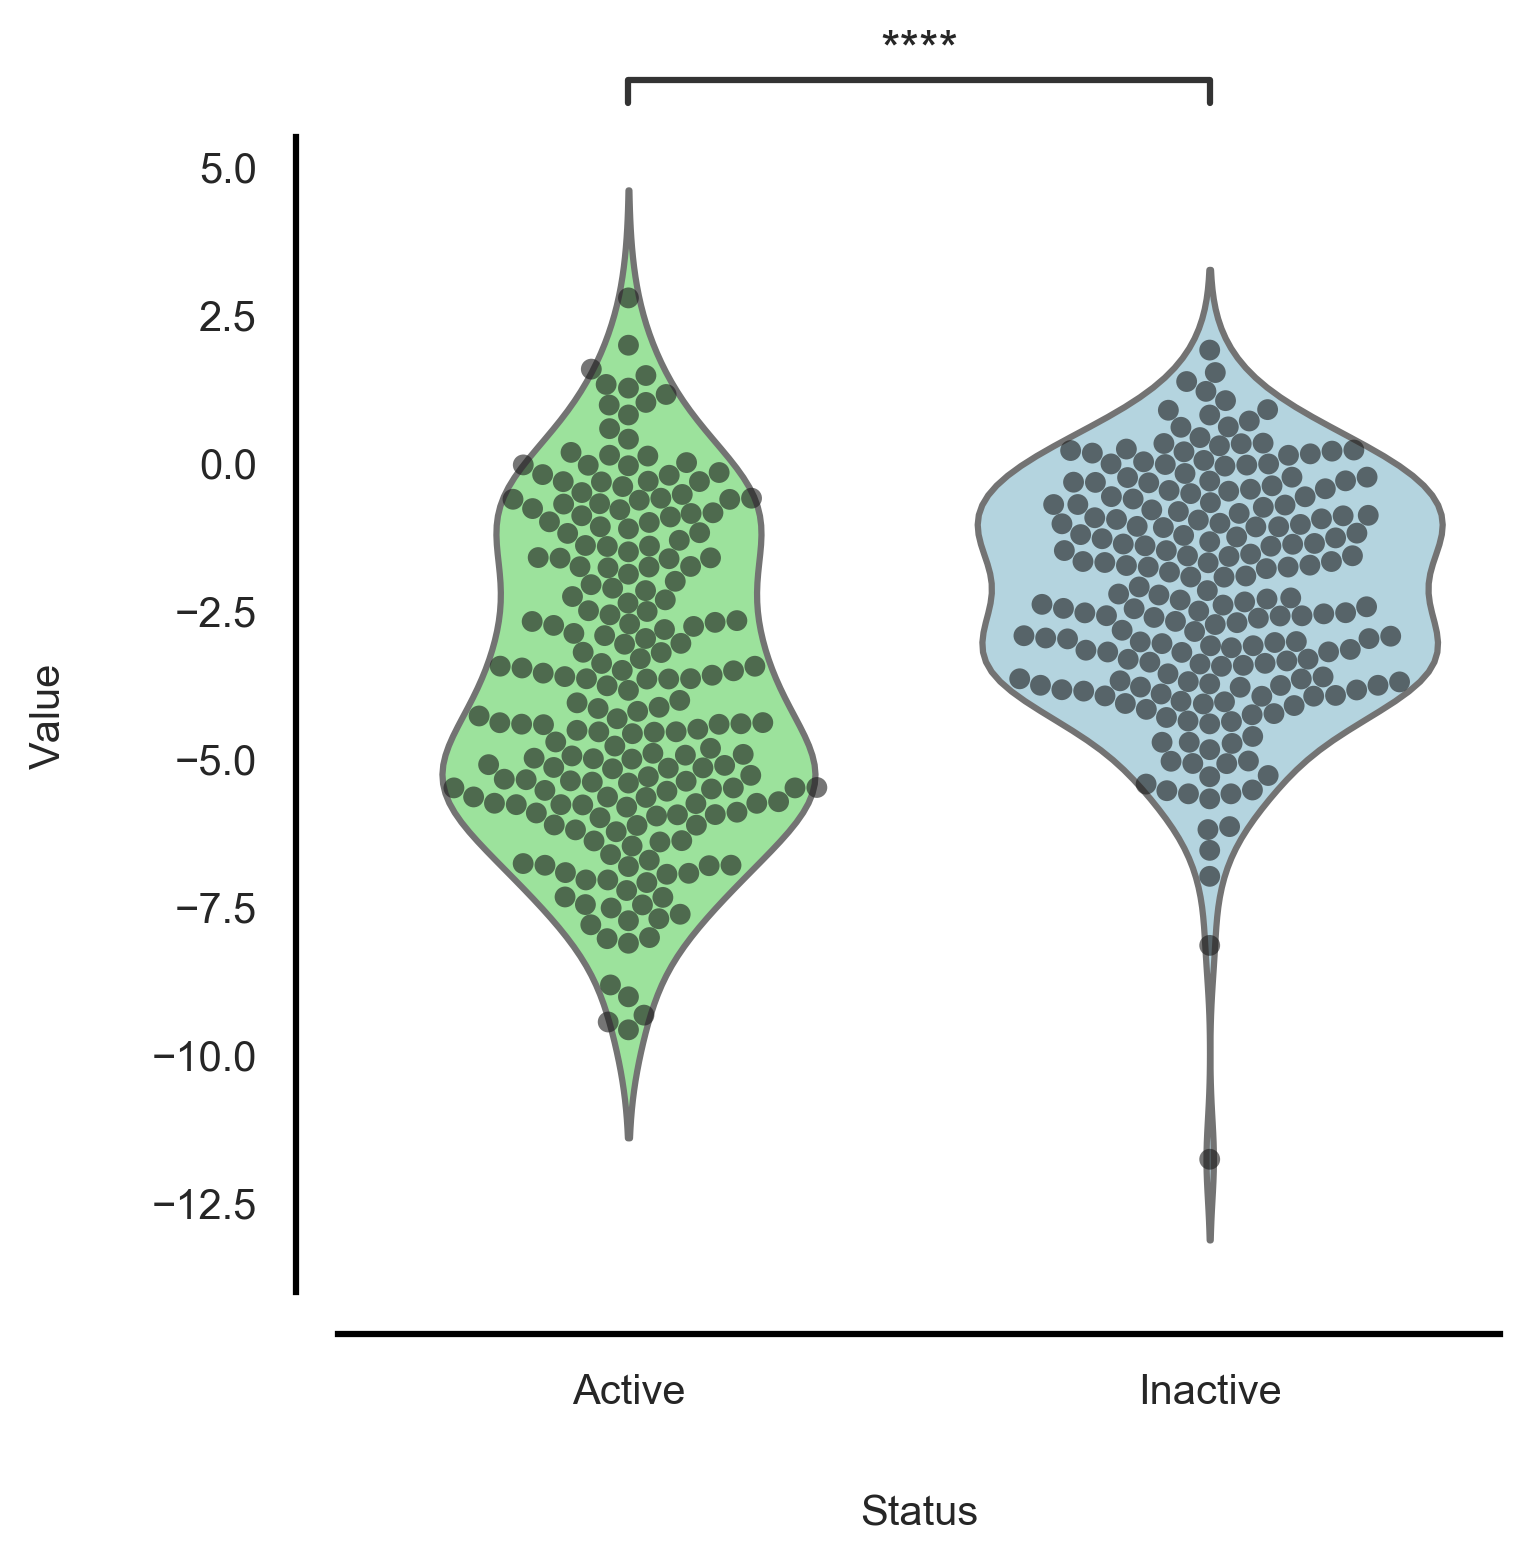

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation  # Ensure this library is installed: pip install statannot

# Set the context to "poster" for larger fonts
sns.set_context("poster", font_scale=1.5)  # Adjust font_scale to increase/decrease the size further

# Set the style to white and remove edge colors
sns.set(style="white", rc={"axes.edgecolor": "none"})

# Create a large figure
plt.figure(figsize=(5, 5), dpi=300)

# Creating the violin plot
ax = sns.violinplot(data=df, x='Status', y='Value', palette={'Active': 'lightgreen', 'Inactive': 'lightblue'}, inner=None)

# Adding the swarm plot on top of the violin plot
sns.swarmplot(data=df, x='Status', y='Value', color='k', alpha=0.6)

# Adding statistical annotations
add_stat_annotation(ax, data=df, x='Status', y='Value',
                    box_pairs=[("Active", "Inactive")],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customizing the appearance of the left and bottom spines
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position(('outward', 10))
    ax.spines[spine].set_linewidth(1.5)
    ax.spines[spine].set_color('black')

# Increasing label font sizes
ax.set_xlabel('Status', fontsize=10, labelpad=20)
ax.set_ylabel('Value', fontsize=10, labelpad=20)

# Adjusting tick parameters for larger font size on both axes
ax.tick_params(axis='both', which='major', labelsize=10)  # Major ticks
ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks (if used)

# Showing the plot
plt.show()


In [49]:
data = pd.read_csv("../The_Moshkov_Files/CP_count_PUMA.csv")
data

,smiles,1_1,10_19,10_20,100_277,100_278,104_291,105_355,105_369,105_361,...,Cells_Neighbors_FirstClosestObjectNumber_Adjacent,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number
0,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.765625,0.890625,0.890625,1.328125,1.328125,1.328125,1.328125,0.960938,1.320312,1.328125
1,O=C(CC1NC(=O)NC1=O)Nc1cccc2ccccc12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.078125,2.718750,2.718750,2.503906,2.503906,2.503906,2.503906,3.242188,2.578125,2.503906
2,CC(Nc1nc(nc2ccccc12)N1CCCC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.765625,-8.140625,-8.140625,-8.250000,-8.250000,-8.250000,-8.250000,-7.710938,-7.546875,-8.250000
3,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.320312,-7.828125,-7.828125,-7.796875,-7.804688,-7.796875,-7.796875,-7.859375,-7.695312,-7.804688
4,CC1=C(C(NC(=O)N1)c1ccc(F)cc1)C(=O)OCc1ccc2OCOc2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.953125,-10.390625,-10.390625,-10.960938,-10.960938,-10.960938,-10.960938,-11.406250,-10.781250,-10.960938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,COC(=O)[C@H]1[C@H](CO)[C@H]2Cn3c(=O)c(\C=C\C)c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.039062,-2.031250,-2.031250,-1.550781,-1.550781,-1.550781,-1.550781,-1.546875,-2.945312,-1.550781
16166,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@H](N(C)[C@@H]...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.851562,-0.359375,-0.359375,-0.835938,-0.835938,-0.835938,-0.835938,-1.328125,-0.804688,-0.835938
16167,C\C=C\c1ccc2n(C[C@@H]3[C@@H](CO)[C@@H](N(C)[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.851562,-3.359375,-3.359375,-3.835938,-3.835938,-3.835938,-3.835938,-3.328125,-4.054688,-3.835938
16168,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)N[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.039062,-2.460938,-2.460938,-3.300781,-3.300781,-3.300781,-3.300781,-3.382812,-2.937500,-3.300781


In [50]:
label_columns =  data.columns.to_list()[1:-13]
print(len(label_columns))

270


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize()

# Function to process each label
def process_label(label):
    results = []
    # Check for active and inactive compounds
    active_compounds = data[data[label] == 1]
    inactive_compounds = data[data[label] == 0]
    
    
    # Find the minimum length between the two groups
    min_length = min(len(active_compounds), len(inactive_compounds))

    # Sample both groups to the minimum length
    active_compounds = active_compounds.sample(n=min_length, random_state=42)
    inactive_compounds = inactive_compounds.sample(n=min_length, random_state=42)

    # Ensure there are more than one active and inactive compounds
    if len(active_compounds) > 1 and len(inactive_compounds) > 1:
        # Add the active compounds' values
        for value in active_compounds['Cells_Number_Object_Number']:
            results.append({'Label': label, 'Status': 'Active', 'Value': value})
        
        # Add the inactive compounds' values
        for value in inactive_compounds['Cells_Number_Object_Number']:
            results.append({'Label': label, 'Status': 'Inactive', 'Value': value})
    
    return results

# Use pandarallel to process all labels in parallel
distribution_results = pd.Series(label_columns).parallel_apply(process_label)

# Flatten the list of lists
distribution_results = [item for sublist in distribution_results for item in sublist]

# Convert results to DataFrame
distribution_df = pd.DataFrame(distribution_results)
distribution_df

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,Label,Status,Value
0,1_1,Active,-15.515625
1,1_1,Active,-21.187500
2,1_1,Inactive,-3.375000
3,1_1,Inactive,3.777344
4,10_19,Active,-16.914062
...,...,...,...
31781,93_259,Inactive,-18.625000
31782,93_259,Inactive,-2.496094
31783,93_259,Inactive,4.101562
31784,93_259,Inactive,-6.398438


In [52]:
df = distribution_df.groupby(["Label", "Status"]).mean().reset_index()
df

,Label,Status,Value
0,100_277,Active,-22.944336
1,100_277,Inactive,-3.384541
2,100_278,Active,-19.282485
3,100_278,Inactive,-4.025916
4,104_289,Active,-29.230415
...,...,...,...
463,92_258,Inactive,-8.703180
464,93_259,Active,-8.943474
465,93_259,Inactive,-4.306383
466,9_18,Active,-20.169922


In [53]:
df.groupby("Status").mean()

,Value
Status,
Active,-12.329377
Inactive,-5.601789


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Active v.s. Inactive: t-test independent samples with Bonferroni correction, P_val=1.503e-16 stat=-8.572e+00


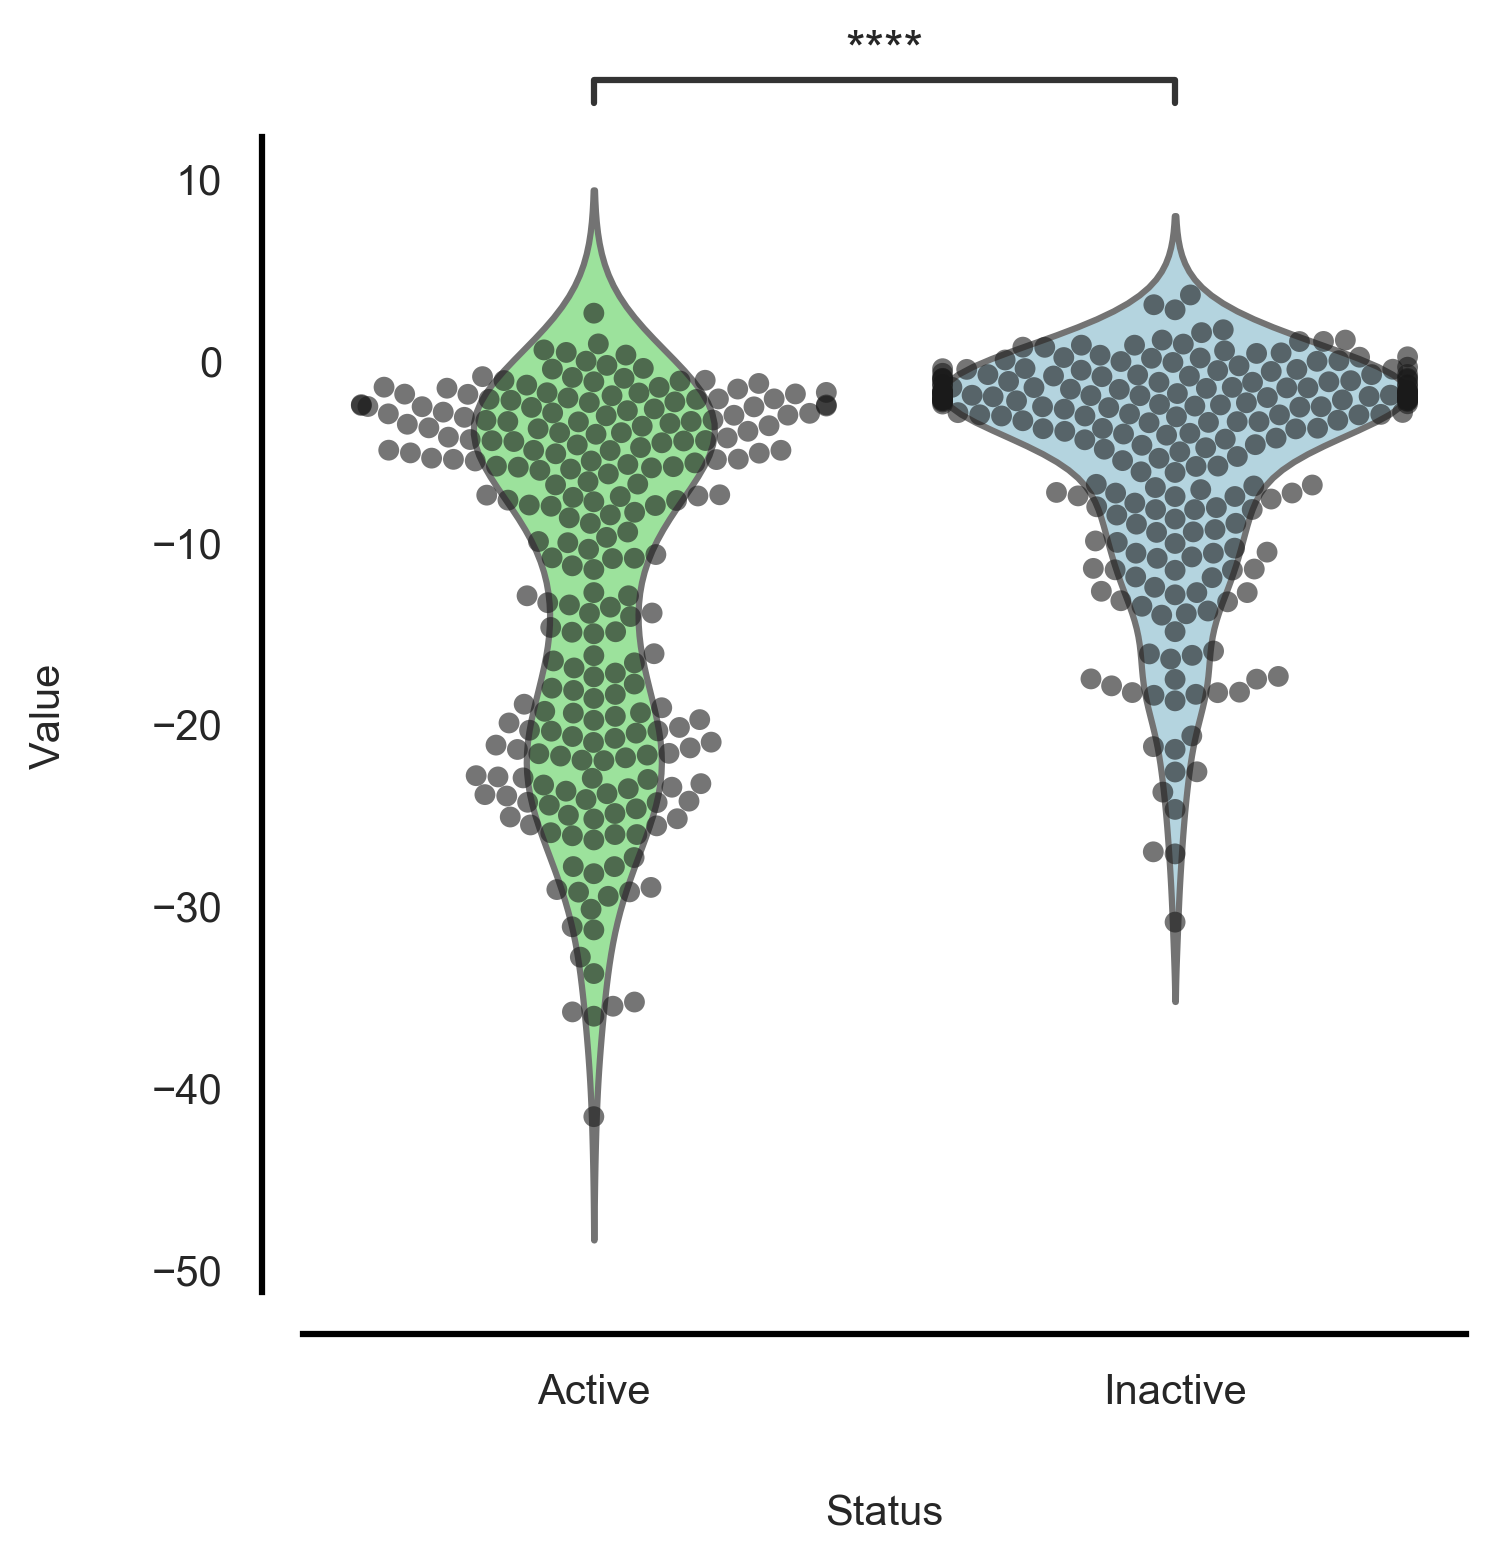

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation  # Ensure this library is installed: pip install statannot

# Set the context to "poster" for larger fonts
sns.set_context("poster", font_scale=1.5)  # Adjust font_scale to increase/decrease the size further

# Set the style to white and remove edge colors
sns.set(style="white", rc={"axes.edgecolor": "none"})

# Create a large figure
plt.figure(figsize=(5, 5), dpi=300)

# Creating the violin plot
ax = sns.violinplot(data=df, x='Status', y='Value', palette={'Active': 'lightgreen', 'Inactive': 'lightblue'}, inner=None)

# Adding the swarm plot on top of the violin plot
sns.swarmplot(data=df, x='Status', y='Value', color='k', alpha=0.6)

# Adding statistical annotations
add_stat_annotation(ax, data=df, x='Status', y='Value',
                    box_pairs=[("Active", "Inactive")],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customizing the appearance of the left and bottom spines
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position(('outward', 10))
    ax.spines[spine].set_linewidth(1.5)
    ax.spines[spine].set_color('black')

# Increasing label font sizes
ax.set_xlabel('Status', fontsize=10, labelpad=20)
ax.set_ylabel('Value', fontsize=10, labelpad=20)

# Adjusting tick parameters for larger font size on both axes
ax.tick_params(axis='both', which='major', labelsize=10)  # Major ticks
ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks (if used)

# Showing the plot
plt.show()


In [24]:
data = pd.read_csv("../The_Ha_Files/CP_count_Ha.csv")
data

,InChIKey,737823,737824,688422,688810,688812,688816,688724,688739,688759,...,Cells_Neighbors_FirstClosestObjectNumber_Adjacent,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number
0,IENZQIKPVFGBNW-UHFFFAOYSA-N,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-15.605469,-14.804688,-14.804688,-15.648438,-15.648438,-15.648438,-15.648438,-16.062500,-15.687500,-15.648438
1,GSDSWSVVBLHKDQ-UHFFFAOYSA-N,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,3.030769,3.807692,3.807692,3.607692,3.607692,3.607692,3.607692,3.123077,4.588462,3.607692
2,CGIGDMFJXJATDK-UHFFFAOYSA-N,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-6.011719,-5.312500,-5.312500,-6.164062,-6.164062,-6.164062,-6.164062,-5.976562,-6.132812,-6.164062
3,DSXXEELGXBCYNQ-UHFFFAOYSA-N,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-31.820312,-31.812500,-31.812500,-31.828125,-31.828125,-31.828125,-31.828125,-31.835938,-32.304688,-31.828125
4,MYSWGUAQZAJSOK-UHFFFAOYSA-N,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,4.070312,3.593750,3.593750,3.617188,3.617188,3.617188,3.617188,4.078125,3.164062,3.617188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10521,YAJYINBQFXCAPI-WENCSYSZSA-N,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-3.171875,-3.062500,-3.062500,-3.625000,-3.632812,-3.625000,-3.625000,-3.125000,-2.953125,-3.632812
10522,DIBJIDYNEHVBAV-KFRKLSNLSA-N,-1,-1,-1,-1,-1,-1,-1,0,-1,...,-2.031250,-1.648438,-1.648438,-3.046875,-3.046875,-3.046875,-3.046875,-2.468750,-2.132812,-3.046875
10523,YAJYINBQFXCAPI-VPYPWEPUSA-N,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-0.804688,-2.265625,-2.265625,-1.875000,-1.875000,-1.875000,-1.875000,-1.351562,-2.718750,-1.875000
10524,YAJYINBQFXCAPI-RZIGYZOXSA-N,-1,-1,-1,0,-1,-1,-1,-1,0,...,0.820312,0.843750,0.843750,1.796875,1.796875,1.796875,1.796875,1.101562,1.281250,1.796875


In [25]:
label_columns =  data.columns.to_list()[1:-12]
print(len(label_columns))

201


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize()

# Function to process each label
def process_label(label):
    results = []
    # Check for active and inactive compounds
    active_compounds = data[data[label] == 1]
    inactive_compounds = data[data[label] == 0]
    
    
    # Find the minimum length between the two groups
    min_length = min(len(active_compounds), len(inactive_compounds))

    # Sample both groups to the minimum length
    active_compounds = active_compounds.sample(n=min_length, random_state=42)
    inactive_compounds = inactive_compounds.sample(n=min_length, random_state=42)

    # Ensure there are more than one active and inactive compounds
    if len(active_compounds) > 1 and len(inactive_compounds) > 1:
        # Add the active compounds' values
        for value in active_compounds['Cells_Number_Object_Number']:
            results.append({'Label': label, 'Status': 'Active', 'Value': value})
        
        # Add the inactive compounds' values
        for value in inactive_compounds['Cells_Number_Object_Number']:
            results.append({'Label': label, 'Status': 'Inactive', 'Value': value})
    
    return results

# Use pandarallel to process all labels in parallel
distribution_results = pd.Series(label_columns).parallel_apply(process_label)

# Flatten the list of lists
distribution_results = [item for sublist in distribution_results for item in sublist]

# Convert results to DataFrame
distribution_df = pd.DataFrame(distribution_results)
distribution_df

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,Label,Status,Value
0,737823,Active,-0.875000
1,737823,Active,-2.968750
2,737823,Active,1.226562
3,737823,Active,-13.331250
4,737823,Active,-2.015625
...,...,...,...
20991,1495346,Inactive,8.359375
20992,1495346,Inactive,0.421875
20993,1495346,Inactive,-3.437500
20994,1495346,Inactive,0.875000


In [27]:
df = distribution_df.groupby(["Label", "Status"]).mean().reset_index()
df

,Label,Status,Value
0,1301428,Active,-5.200292
1,1301428,Inactive,-2.938625
2,1301435,Active,-12.166210
3,1301435,Inactive,-2.142879
4,1301460,Active,-9.996785
...,...,...,...
397,954305,Inactive,0.341115
398,954333,Active,-6.023251
399,954333,Inactive,-4.186012
400,954338,Active,-2.170318


In [28]:
df.groupby("Status").mean()

,Value
Status,
Active,-13.773622
Inactive,-3.977098


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Active v.s. Inactive: t-test independent samples with Bonferroni correction, P_val=7.324e-27 stat=-1.156e+01


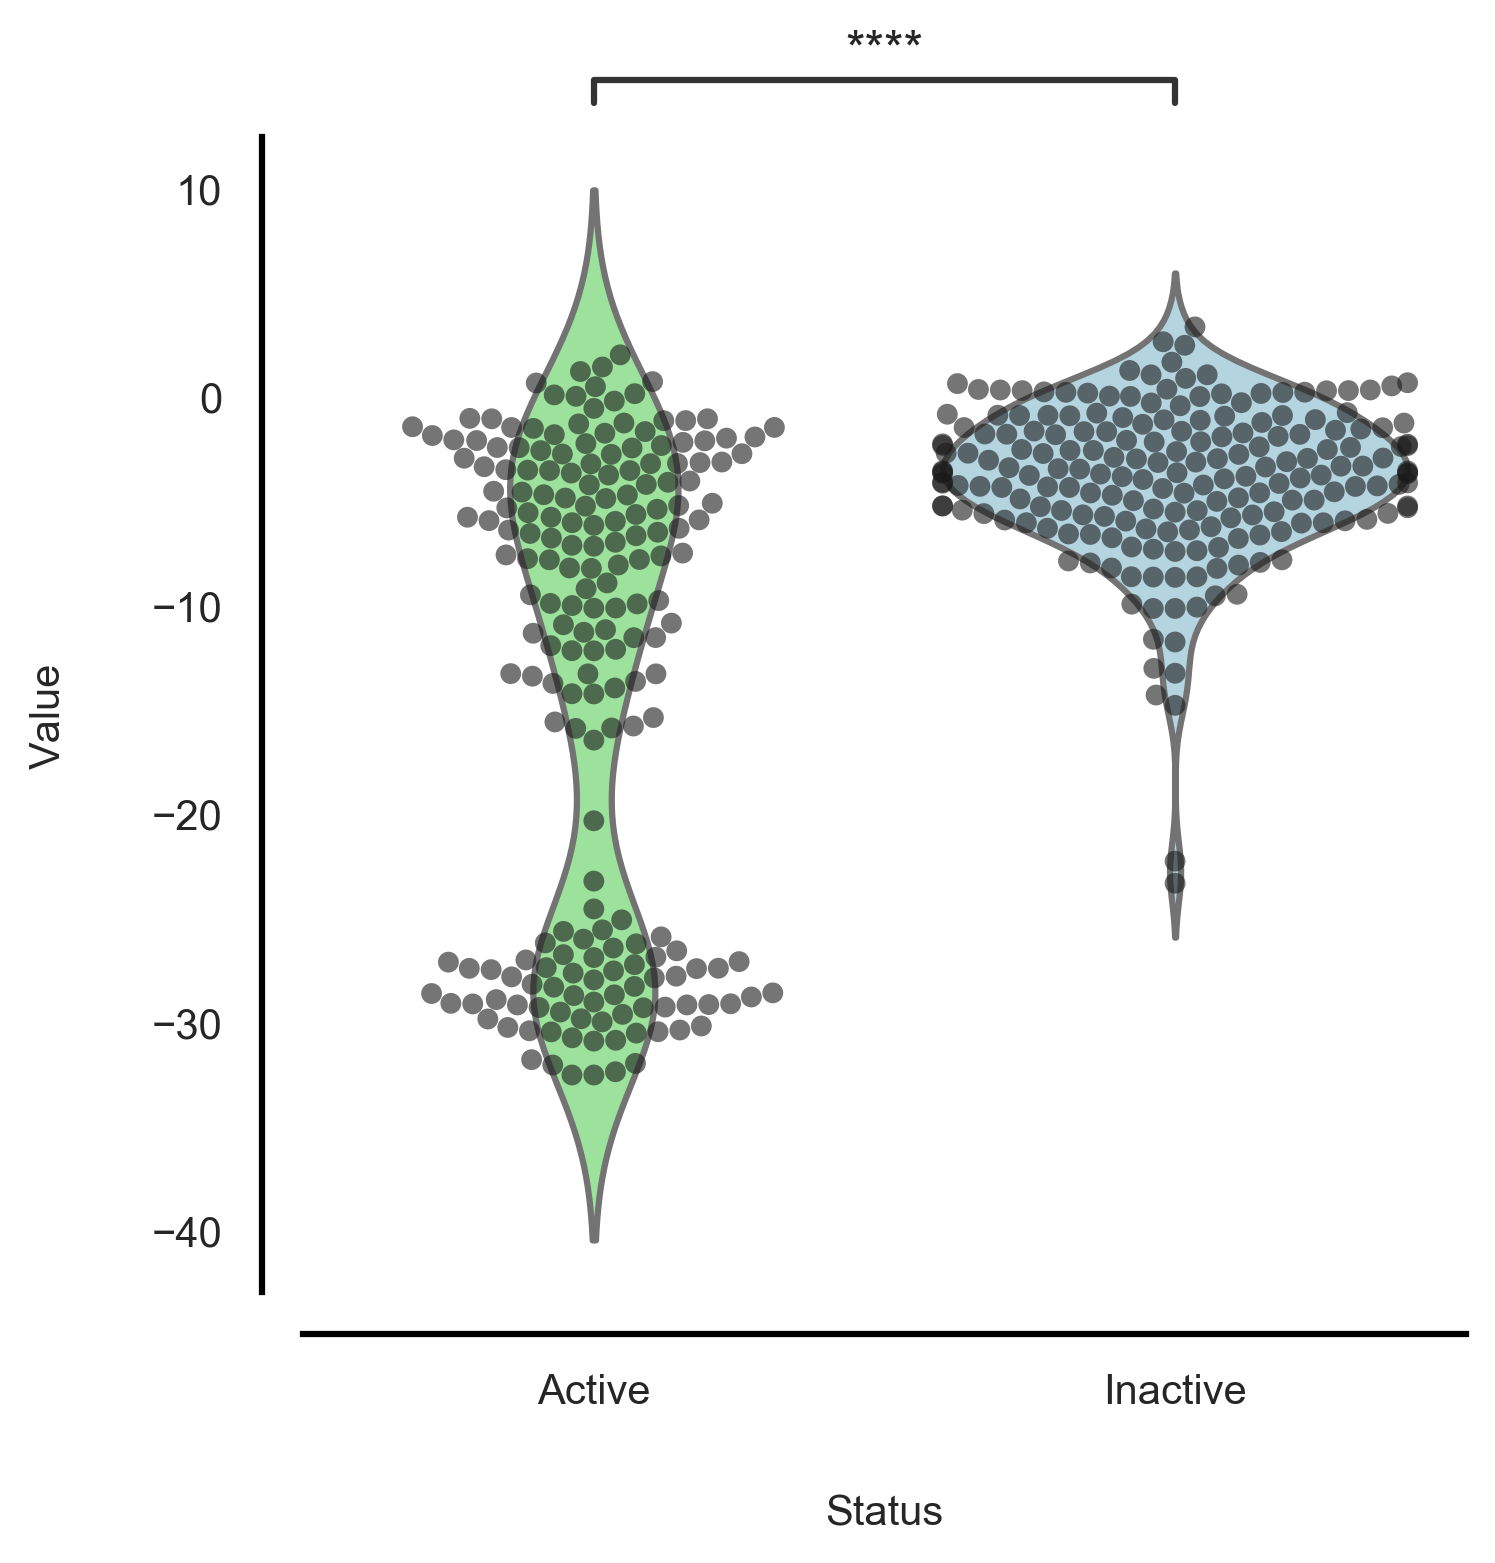

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation  # Ensure this library is installed: pip install statannot

# Set the context to "poster" for larger fonts
sns.set_context("poster", font_scale=1.5)  # Adjust font_scale to increase/decrease the size further

# Set the style to white and remove edge colors
sns.set(style="white", rc={"axes.edgecolor": "none"})

# Create a large figure
plt.figure(figsize=(5, 5), dpi=300)

# Creating the violin plot
ax = sns.violinplot(data=df, x='Status', y='Value', palette={'Active': 'lightgreen', 'Inactive': 'lightblue'}, inner=None)

# Adding the swarm plot on top of the violin plot
sns.swarmplot(data=df, x='Status', y='Value', color='k', alpha=0.6)

# Adding statistical annotations
add_stat_annotation(ax, data=df, x='Status', y='Value',
                    box_pairs=[("Active", "Inactive")],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customizing the appearance of the left and bottom spines
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position(('outward', 10))
    ax.spines[spine].set_linewidth(1.5)
    ax.spines[spine].set_color('black')

# Increasing label font sizes
ax.set_xlabel('Status', fontsize=10, labelpad=20)
ax.set_ylabel('Value', fontsize=10, labelpad=20)

# Adjusting tick parameters for larger font size on both axes
ax.tick_params(axis='both', which='major', labelsize=10)  # Major ticks
ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks (if used)

# Showing the plot
plt.show()
